In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np
from statistics import mean 

In [2]:
movies_2015_2024 = pd.read_csv('../data/movies_2015_2024.csv')
movies_2015_2024.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,365000000,1405403694,99861
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,150000000,378858340,76341


#### Exploratory Question: How do budget and revenue vary by year or by genre? #5

In [4]:
movies_2015_2024['budget_minus_rev'] = movies_2015_2024['Revenue'].sub(movies_2015_2024['Budget'], axis=0)
movies_2015_2024

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,365000000,1405403694,99861,1040403694
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,150000000,378858340,76341,228858340
2,Inside Out,2015,"['Animation', 'Family', 'Adventure', 'Drama', ...",7.910,22924,175000000,857611174,150540,682611174
3,Jurassic World,2015,"['Action', 'Adventure', 'Science Fiction', 'Th...",6.699,21102,150000000,1671537444,135397,1521537444
4,The Martian,2015,"['Drama', 'Adventure', 'Science Fiction']",7.691,20590,108000000,631058917,286217,523058917
...,...,...,...,...,...,...,...,...,...
1002,Drive My Car,2021,['Drama'],7.400,1407,1300000,15356046,758866,14056046
1003,TÁR,2022,"['Music', 'Drama']",7.090,1426,35000000,29048571,817758,-5951429
1004,Women Talking,2022,['Drama'],6.861,661,20000000,7589419,777245,-12410581
1005,Maestro,2023,"['Drama', 'Romance', 'Music']",6.292,791,80000000,300000,523607,-79700000


In [5]:
movies_2015_2024['profitable'] = movies_2015_2024['budget_minus_rev'] > 0
movies_2015_2024

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,365000000,1405403694,99861,1040403694,True
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,150000000,378858340,76341,228858340,True
2,Inside Out,2015,"['Animation', 'Family', 'Adventure', 'Drama', ...",7.910,22924,175000000,857611174,150540,682611174,True
3,Jurassic World,2015,"['Action', 'Adventure', 'Science Fiction', 'Th...",6.699,21102,150000000,1671537444,135397,1521537444,True
4,The Martian,2015,"['Drama', 'Adventure', 'Science Fiction']",7.691,20590,108000000,631058917,286217,523058917,True
...,...,...,...,...,...,...,...,...,...,...
1002,Drive My Car,2021,['Drama'],7.400,1407,1300000,15356046,758866,14056046,True
1003,TÁR,2022,"['Music', 'Drama']",7.090,1426,35000000,29048571,817758,-5951429,False
1004,Women Talking,2022,['Drama'],6.861,661,20000000,7589419,777245,-12410581,False
1005,Maestro,2023,"['Drama', 'Romance', 'Music']",6.292,791,80000000,300000,523607,-79700000,False


In [6]:
movies_2015_2024['Genre'] = movies_2015_2024['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
movies_exploded = movies_2015_2024.explode('Genre', ignore_index = False)

In [7]:
movies_exploded

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,Action,7.271,23855,365000000,1405403694,99861,1040403694,True
0,Avengers: Age of Ultron,2015,Adventure,7.271,23855,365000000,1405403694,99861,1040403694,True
0,Avengers: Age of Ultron,2015,Science Fiction,7.271,23855,365000000,1405403694,99861,1040403694,True
1,Mad Max: Fury Road,2015,Action,7.627,23511,150000000,378858340,76341,228858340,True
1,Mad Max: Fury Road,2015,Adventure,7.627,23511,150000000,378858340,76341,228858340,True
...,...,...,...,...,...,...,...,...,...,...
1005,Maestro,2023,Drama,6.292,791,80000000,300000,523607,-79700000,False
1005,Maestro,2023,Romance,6.292,791,80000000,300000,523607,-79700000,False
1005,Maestro,2023,Music,6.292,791,80000000,300000,523607,-79700000,False
1006,Nickel Boys,2024,Drama,6.615,293,23200000,3016380,1028196,-20183620,False


In [8]:
movies_2015 = movies_2015_2024[movies_2015_2024['Year'] == 2015]
movies_2015

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"[Action, Adventure, Science Fiction]",7.271,23855,365000000,1405403694,99861,1040403694,True
1,Mad Max: Fury Road,2015,"[Action, Adventure, Science Fiction]",7.627,23511,150000000,378858340,76341,228858340,True
2,Inside Out,2015,"[Animation, Family, Adventure, Drama, Comedy]",7.910,22924,175000000,857611174,150540,682611174,True
3,Jurassic World,2015,"[Action, Adventure, Science Fiction, Thriller]",6.699,21102,150000000,1671537444,135397,1521537444,True
4,The Martian,2015,"[Drama, Adventure, Science Fiction]",7.691,20590,108000000,631058917,286217,523058917,True
...,...,...,...,...,...,...,...,...,...,...
95,Youth,2015,"[Comedy, Drama, Romance]",6.900,2144,13360000,2000000,310593,-11360000,False
96,Blackhat,2015,"[Crime, Thriller, Action]",5.514,2118,70000000,17752940,201088,-52247060,False
97,Aloha,2015,"[Drama, Comedy, Romance]",5.514,2111,37000000,26250020,222936,-10749980,False
98,The Boy Next Door,2015,[Thriller],4.919,2089,4000000,52425855,241251,48425855,True


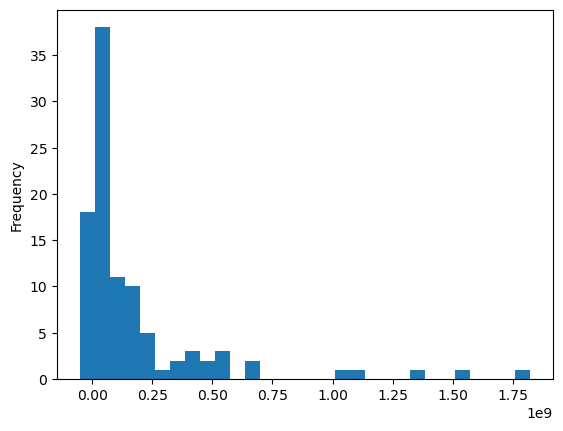

In [9]:
movies_2015['budget_minus_rev'].plot(kind='hist', bins = 30);

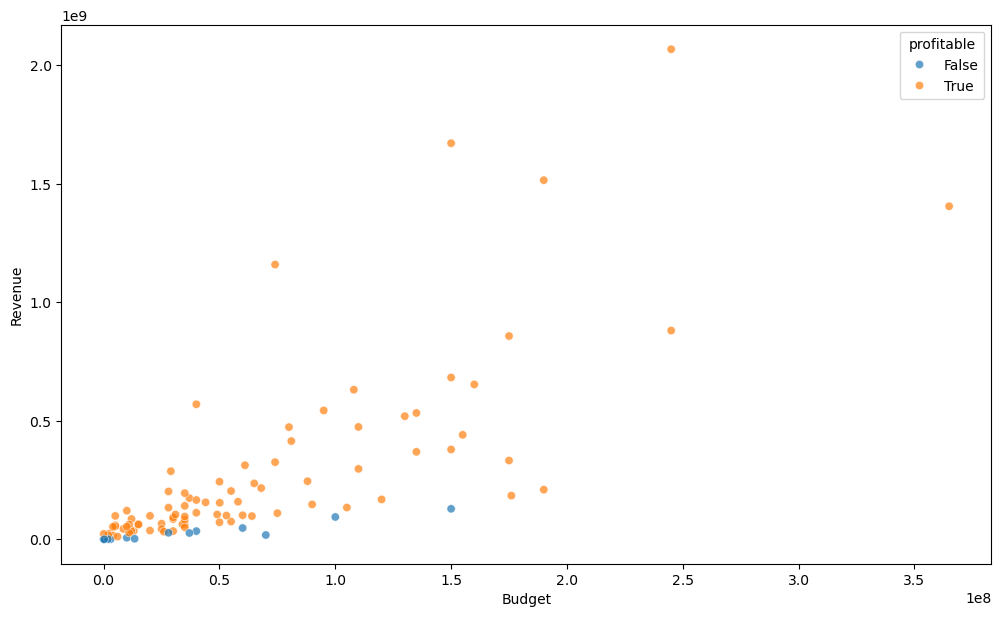

In [10]:
plt.figure(figsize = (12,7))
sns.scatterplot(
    data=movies_2015,
    x="Budget",
    y="Revenue",
    hue="profitable",
    alpha = 0.7
);

In [11]:
movies_2015[(movies_2015.Budget > 350000000) & (movies_2015.Revenue > 1000000)]

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"[Action, Adventure, Science Fiction]",7.271,23855,365000000,1405403694,99861,1040403694,True


In [12]:
movies_2015[(movies_2015.Budget > 200000000) & (movies_2015.Revenue > 15000000)]

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"[Action, Adventure, Science Fiction]",7.271,23855,365000000,1405403694,99861,1040403694,True
6,Star Wars: The Force Awakens,2015,"[Adventure, Action, Science Fiction]",7.254,20076,245000000,2068223624,140607,1823223624,True
13,Spectre,2015,"[Action, Adventure, Thriller]",6.600,10917,245000000,880707597,206647,635707597,True


In [13]:
# Convert Genre column to list type so that it can be exploded
movies_2015_2024['Genre'] = movies_2015_2024['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

<Figure size 1000x500 with 0 Axes>

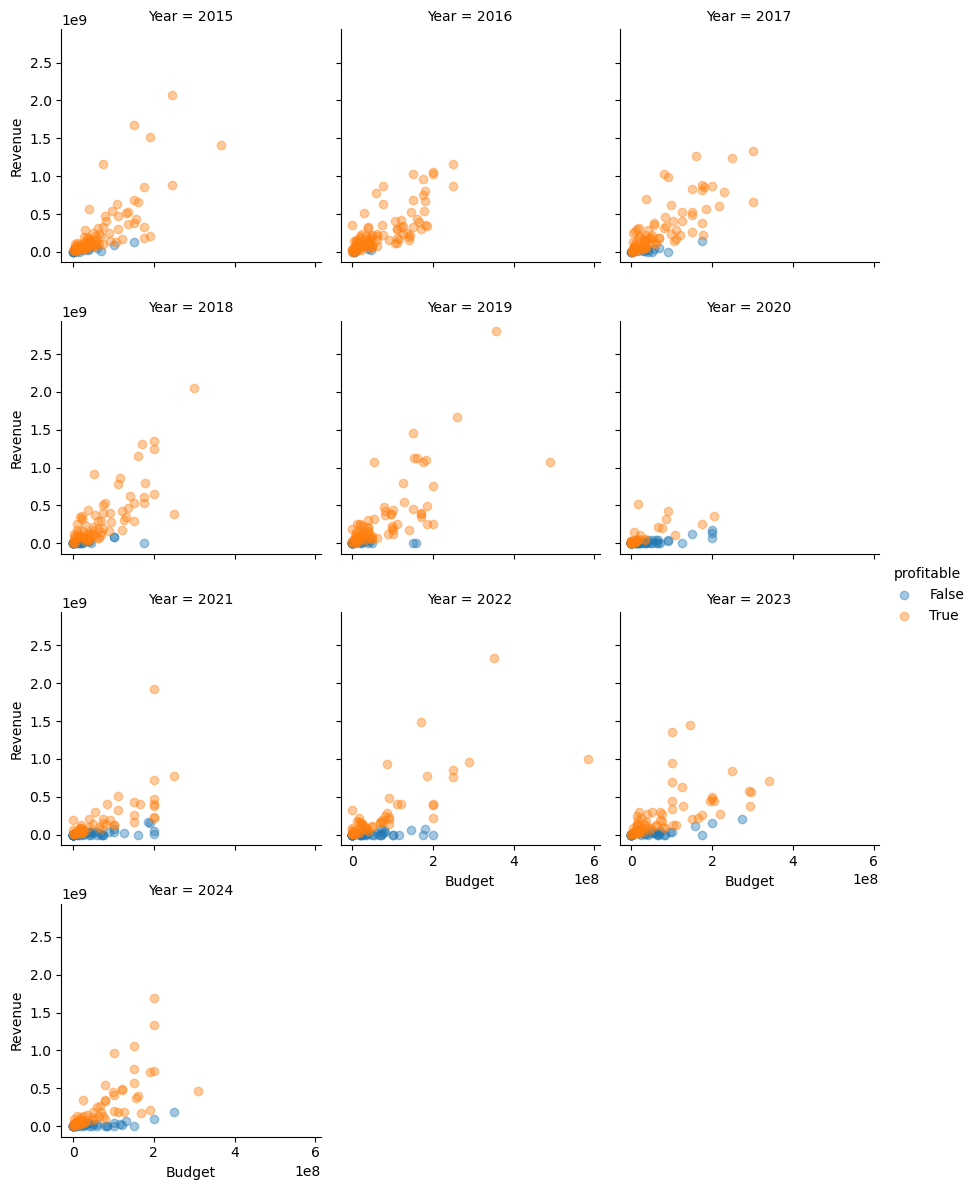

In [14]:
g = sns.FacetGrid(
    movies_2015_2024,
    col="Year",
    col_wrap=3,
    hue="profitable"#,
    #sharey=False
)

plt.figure(figsize=(10,5))
g.map(plt.scatter, 'Budget', 'Revenue', alpha=0.4).add_legend()
#plt.yticks(np.arange(0, 100000, step=5000))
plt.show()

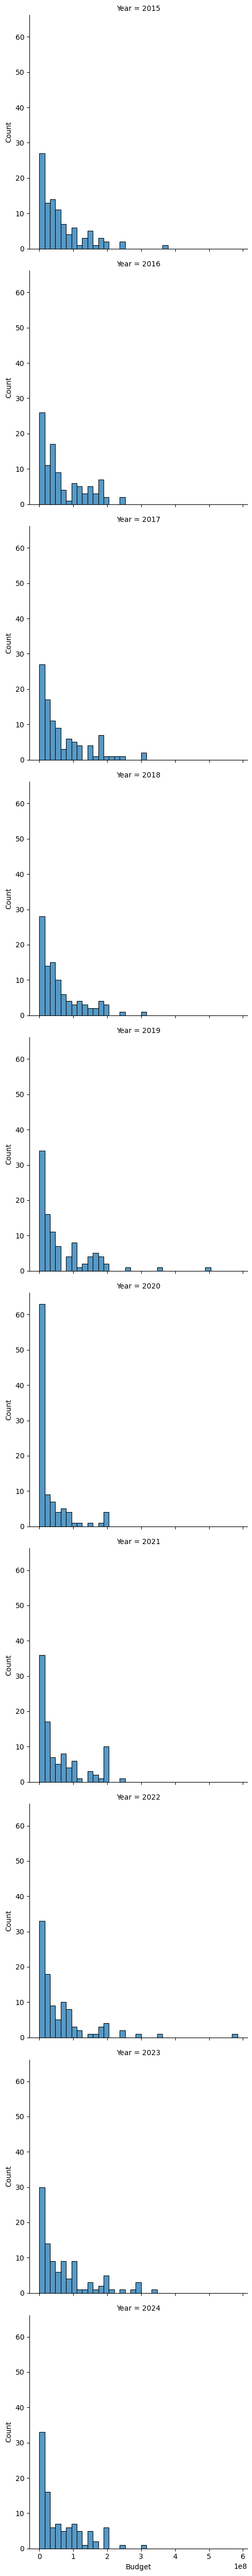

In [15]:
df = movies_2015_2024
sns.displot(
    df,
    x="Budget",
    col="Year",
    col_wrap=1#,
    #hue="profitable"#,
    #sharey=False
)

In [16]:
#g = sns.FacetGrid(movies_2015_2024, col="Revenue", row="Budget")#, margin_titles=True)
#g.map_dataframe(
#    sns.scatter, x="Budget", y="Revenue", color="orange", order=movies_2015_2024["Year"].unique()
#)
#g.set_axis_labels("Budget")
#g.set_xticklabels(rotation=90)

In [17]:
#g = sns.pairplot(movies_2015_2024, kind='scatter', plot_kws={'alpha': 0.1})

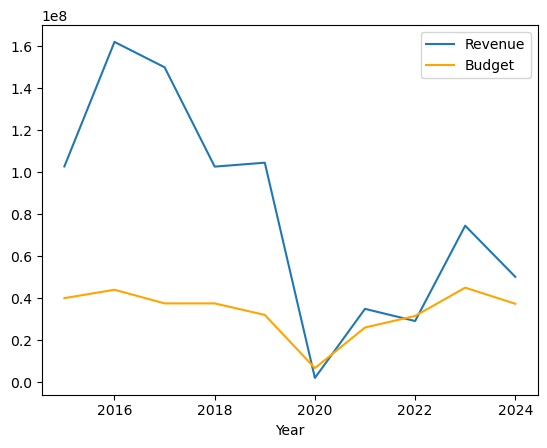

In [18]:
#plt.figure(figsize = (12,7))

median_rev_by_year = movies_2015_2024.groupby('Year')['Revenue'].median().reset_index()
median_budget_by_year = movies_2015_2024.groupby('Year')['Budget'].median().reset_index()
ax = median_rev_by_year.plot(x='Year', y='Revenue', kind='line')
median_budget_by_year.plot(ax=ax, x='Year', y='Budget', kind='line', color='orange')
plt.show();


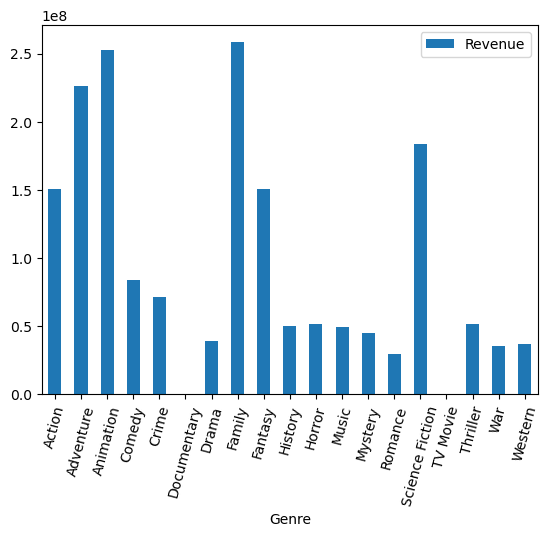

In [19]:
median_rev_by_year = movies_exploded.groupby('Genre')['Revenue'].median().reset_index()
median_rev_by_year.plot(x='Genre', y='Revenue', kind='bar')
plt.xticks(rotation = 75);

<Axes: xlabel='Genre'>

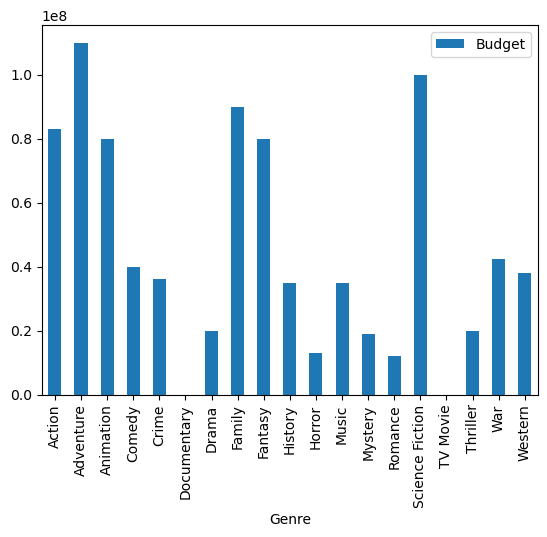

In [20]:
median_rev_by_year = movies_exploded.groupby('Genre')['Budget'].median().reset_index()
median_rev_by_year.plot(x='Genre', y='Budget', kind='bar')

In [21]:
df

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"[Action, Adventure, Science Fiction]",7.271,23855,365000000,1405403694,99861,1040403694,True
1,Mad Max: Fury Road,2015,"[Action, Adventure, Science Fiction]",7.627,23511,150000000,378858340,76341,228858340,True
2,Inside Out,2015,"[Animation, Family, Adventure, Drama, Comedy]",7.910,22924,175000000,857611174,150540,682611174,True
3,Jurassic World,2015,"[Action, Adventure, Science Fiction, Thriller]",6.699,21102,150000000,1671537444,135397,1521537444,True
4,The Martian,2015,"[Drama, Adventure, Science Fiction]",7.691,20590,108000000,631058917,286217,523058917,True
...,...,...,...,...,...,...,...,...,...,...
1002,Drive My Car,2021,[Drama],7.400,1407,1300000,15356046,758866,14056046,True
1003,TÁR,2022,"[Music, Drama]",7.090,1426,35000000,29048571,817758,-5951429,False
1004,Women Talking,2022,[Drama],6.861,661,20000000,7589419,777245,-12410581,False
1005,Maestro,2023,"[Drama, Romance, Music]",6.292,791,80000000,300000,523607,-79700000,False


In [109]:
df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df = df.rename(columns = {'variable': 'Legend'})
#df['value'] = (df['value'] / 10000000)
df['value'] = np.log10(df['value']+1)
df

,Genre,Legend,value
0,Action,Revenue,21.063590
1,Adventure,Revenue,21.063590
2,Science Fiction,Revenue,21.063590
3,Action,Revenue,19.752673
4,Adventure,Revenue,19.752673
...,...,...,...
5661,Drama,Budget,18.197537
5662,Romance,Budget,18.197537
5663,Music,Budget,18.197537
5664,Drama,Budget,16.959663


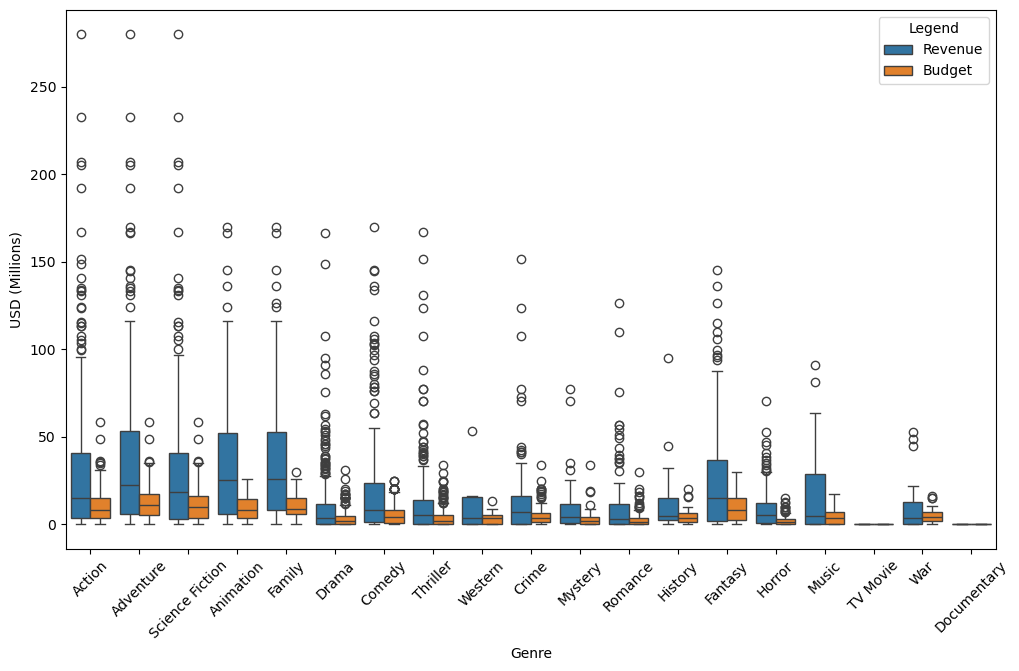

In [115]:
plt.figure(figsize = (12,7))

df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df = df.rename(columns = {'variable': 'Legend'})
df['value'] = (df['value'] / 10000000)
ax = sns.boxplot(x = df['Genre'], y = df['value'], hue = df['Legend'])
#ax.set(ylim=(0, 300000000))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set(ylabel='USD (Millions)')
plt.xticks(rotation = 45);

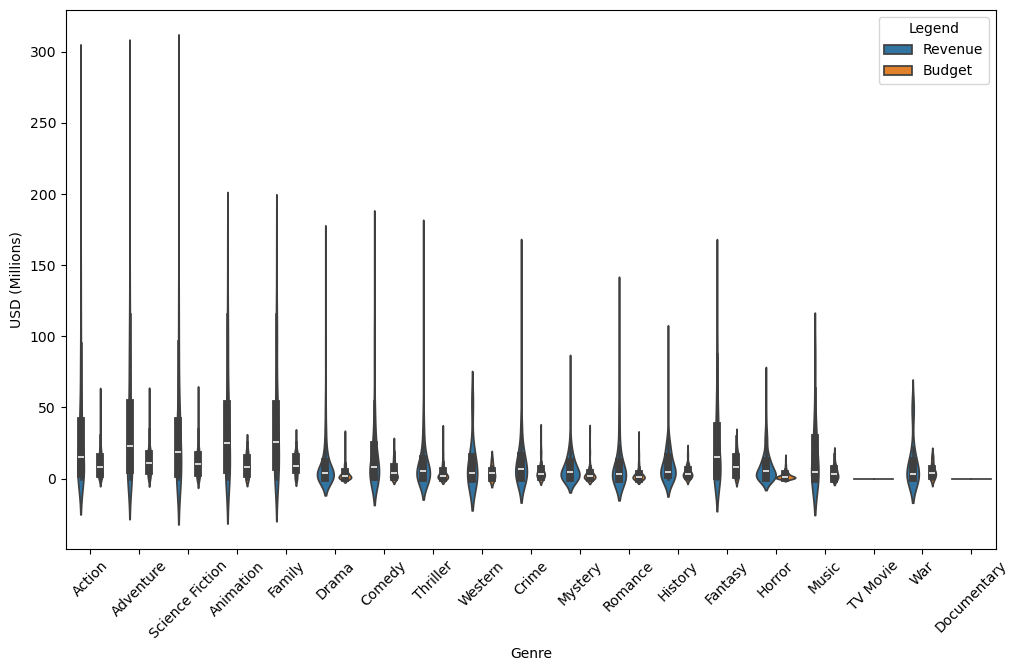

In [119]:
plt.figure(figsize = (12,7))

df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df = df.rename(columns = {'variable': 'Legend'})
df['value'] = (df['value'] / 10000000)
ax = sns.violinplot(x = df['Genre'], y = df['value'], hue = df['Legend'])
#ax.set(ylim=(0, 300000000))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set(ylabel='USD (Millions)')
plt.xticks(rotation = 45);

In [23]:

df

,Genre,Budget/Revenue,value
0,Action,Revenue,140.540369
1,Adventure,Revenue,140.540369
2,Science Fiction,Revenue,140.540369
3,Action,Revenue,37.885834
4,Adventure,Revenue,37.885834
...,...,...,...
5661,Drama,Budget,8.000000
5662,Romance,Budget,8.000000
5663,Music,Budget,8.000000
5664,Drama,Budget,2.320000


In [24]:
df['value'] = (df['value'] / 1000000)
df

,Genre,Budget/Revenue,value
0,Action,Revenue,0.000141
1,Adventure,Revenue,0.000141
2,Science Fiction,Revenue,0.000141
3,Action,Revenue,0.000038
4,Adventure,Revenue,0.000038
...,...,...,...
5661,Drama,Budget,0.000008
5662,Romance,Budget,0.000008
5663,Music,Budget,0.000008
5664,Drama,Budget,0.000002


In [25]:
median_rev_by_action = movies_exploded[movies_exploded['Genre'] =='Action'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_adventure = movies_exploded[movies_exploded['Genre'] =='Adventure'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_animation = movies_exploded[movies_exploded['Genre'] =='Animation'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_comedy = movies_exploded[movies_exploded['Genre'] =='Comedy'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_crime = movies_exploded[movies_exploded['Genre'] =='Crime'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_documentary = movies_exploded[movies_exploded['Genre'] =='Documentary'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_drama = movies_exploded[movies_exploded['Genre'] =='Drama'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_family = movies_exploded[movies_exploded['Genre'] =='Family'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_fantasy = movies_exploded[movies_exploded['Genre'] =='Fantasy'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_history = movies_exploded[movies_exploded['Genre'] =='History'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_horror = movies_exploded[movies_exploded['Genre'] =='Horror'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_music = movies_exploded[movies_exploded['Genre'] =='Music'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_mystery = movies_exploded[movies_exploded['Genre'] =='Mystery'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_romance = movies_exploded[movies_exploded['Genre'] =='Romance'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_scifi = movies_exploded[movies_exploded['Genre'] =='Science Fiction'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_tvmovies = movies_exploded[movies_exploded['Genre'] =='TV Movies'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_thriller = movies_exploded[movies_exploded['Genre'] =='Thriller'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_war = movies_exploded[movies_exploded['Genre'] =='War'].groupby('Year')['Revenue'].median().reset_index()
median_rev_by_western = movies_exploded[movies_exploded['Genre'] =='Western'].groupby('Year')['Revenue'].median().reset_index()

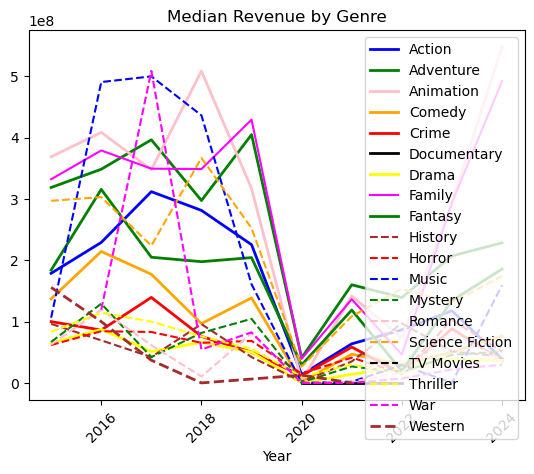

In [26]:
#plt.figure(figsize=(10, 10))#, dpi=120)
ax = median_rev_by_action.plot(x='Year', y='Revenue', kind='line', color='blue', label='Action', linewidth=2)
median_rev_by_adventure.plot(ax=ax, x='Year', y='Revenue', kind='line', color='green', label='Adventure', linewidth=2)
median_rev_by_animation.plot(ax=ax, x='Year', y='Revenue', kind='line', color='pink', label='Animation', linewidth=2)
median_rev_by_comedy.plot(ax=ax, x='Year', y='Revenue', kind='line', color='orange', label='Comedy', linewidth=2)
median_rev_by_crime.plot(ax=ax, x='Year', y='Revenue', kind='line', color='red', label='Crime', linewidth=2)
median_rev_by_documentary.plot(ax=ax, x='Year', y='Revenue', kind='line', color='black', label='Documentary', linewidth=2)
median_rev_by_drama.plot(ax=ax, x='Year', y='Revenue', kind='line', color='yellow', label='Drama', linewidth=2)
median_rev_by_family.plot(ax=ax, x='Year', y='Revenue', kind='line', color='magenta', label='Family')
median_rev_by_fantasy.plot(ax=ax, x='Year', y='Revenue', kind='line', color='green', label='Fantasy', linewidth=2)
median_rev_by_history.plot(ax=ax, x='Year', y='Revenue', kind='line', color='brown', label='History', linestyle = '--')
median_rev_by_horror.plot(ax=ax, x='Year', y='Revenue', kind='line', color='red', label='Horror', linestyle = '--')
median_rev_by_music.plot(ax=ax, x='Year', y='Revenue', kind='line', color='blue', label='Music', linestyle = '--')
median_rev_by_mystery.plot(ax=ax, x='Year', y='Revenue', kind='line', color='green', label='Mystery', linestyle = '--')
median_rev_by_romance.plot(ax=ax, x='Year', y='Revenue', kind='line', color='pink', label='Romance', linestyle = '--')
median_rev_by_scifi.plot(ax=ax, x='Year', y='Revenue', kind='line', color='orange', label='Science Fiction', linestyle = '--')
median_rev_by_tvmovies.plot(ax=ax, x='Year', y='Revenue', kind='line', color='black', label='TV Movies', linestyle = '--')
median_rev_by_thriller.plot(ax=ax, x='Year', y='Revenue', kind='line', color='yellow', label='Thriller', linestyle = '--')
median_rev_by_war.plot(ax=ax, x='Year', y='Revenue', kind='line', color='magenta', label='War', linestyle = '--')
median_rev_by_western.plot(ax=ax, x='Year', y='Revenue', kind='line', color='brown', label='Western', linewidth=2, linestyle = '--')

plt.legend()
plt.xticks(rotation = 45);

#plt.subplot().set_ylabel('Median Revenue in 100 Millions')
#plt.axis('tight')
plt.title('Median Revenue by Genre')
plt.show();

In [27]:
median_rev_by_action = movies_exploded[movies_exploded['Genre'] =='Action'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_adventure = movies_exploded[movies_exploded['Genre'] =='Adventure'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_animation = movies_exploded[movies_exploded['Genre'] =='Animation'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_comedy = movies_exploded[movies_exploded['Genre'] =='Comedy'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_crime = movies_exploded[movies_exploded['Genre'] =='Crime'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_documentary = movies_exploded[movies_exploded['Genre'] =='Documentary'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_drama = movies_exploded[movies_exploded['Genre'] =='Drama'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_family = movies_exploded[movies_exploded['Genre'] =='Family'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_fantasy = movies_exploded[movies_exploded['Genre'] =='Fantasy'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_history = movies_exploded[movies_exploded['Genre'] =='History'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_horror = movies_exploded[movies_exploded['Genre'] =='Horror'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_music = movies_exploded[movies_exploded['Genre'] =='Music'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_mystery = movies_exploded[movies_exploded['Genre'] =='Mystery'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_romance = movies_exploded[movies_exploded['Genre'] =='Romance'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_scifi = movies_exploded[movies_exploded['Genre'] =='Science Fiction'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_tvmovies = movies_exploded[movies_exploded['Genre'] =='TV Movies'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_thriller = movies_exploded[movies_exploded['Genre'] =='Thriller'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_war = movies_exploded[movies_exploded['Genre'] =='War'].groupby('Year')['Budget'].median().reset_index()
median_rev_by_western = movies_exploded[movies_exploded['Genre'] =='Western'].groupby('Year')['Budget'].median().reset_index()

<Figure size 1000x1000 with 0 Axes>

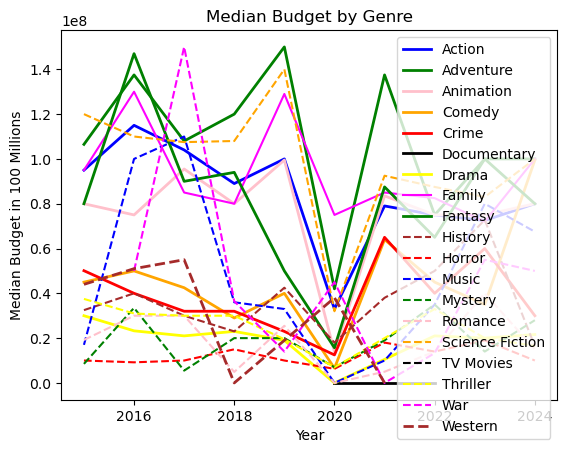

In [28]:
plt.figure(figsize=(10, 10))#, dpi=120)

ax = median_rev_by_action.plot(x='Year', y='Budget', kind='line', color='blue', label='Action', linewidth=2)

median_rev_by_adventure.plot(ax=ax, x='Year', y='Budget', kind='line', color='green', label='Adventure', linewidth=2)
median_rev_by_animation.plot(ax=ax, x='Year', y='Budget', kind='line', color='pink', label='Animation', linewidth=2)
median_rev_by_comedy.plot(ax=ax, x='Year', y='Budget', kind='line', color='orange', label='Comedy', linewidth=2)
median_rev_by_crime.plot(ax=ax, x='Year', y='Budget', kind='line', color='red', label='Crime', linewidth=2)
median_rev_by_documentary.plot(ax=ax, x='Year', y='Budget', kind='line', color='black', label='Documentary', linewidth=2)
median_rev_by_drama.plot(ax=ax, x='Year', y='Budget', kind='line', color='yellow', label='Drama', linewidth=2)
median_rev_by_family.plot(ax=ax, x='Year', y='Budget', kind='line', color='magenta', label='Family')
median_rev_by_fantasy.plot(ax=ax, x='Year', y='Budget', kind='line', color='green', label='Fantasy', linewidth=2)
median_rev_by_history.plot(ax=ax, x='Year', y='Budget', kind='line', color='brown', label='History', linestyle = '--')
median_rev_by_horror.plot(ax=ax, x='Year', y='Budget', kind='line', color='red', label='Horror', linestyle = '--')
median_rev_by_music.plot(ax=ax, x='Year', y='Budget', kind='line', color='blue', label='Music', linestyle = '--')
median_rev_by_mystery.plot(ax=ax, x='Year', y='Budget', kind='line', color='green', label='Mystery', linestyle = '--')
median_rev_by_romance.plot(ax=ax, x='Year', y='Budget', kind='line', color='pink', label='Romance', linestyle = '--')
median_rev_by_scifi.plot(ax=ax, x='Year', y='Budget', kind='line', color='orange', label='Science Fiction', linestyle = '--')
median_rev_by_tvmovies.plot(ax=ax, x='Year', y='Budget', kind='line', color='black', label='TV Movies', linestyle = '--')
median_rev_by_thriller.plot(ax=ax, x='Year', y='Budget', kind='line', color='yellow', label='Thriller', linestyle = '--')
median_rev_by_war.plot(ax=ax, x='Year', y='Budget', kind='line', color='magenta', label='War', linestyle = '--')
median_rev_by_western.plot(ax=ax, x='Year', y='Budget', kind='line', color='brown', label='Western', linewidth=2, linestyle = '--')

plt.legend()

plt.ylabel('Median Budget in 100 Millions')
#plt.axis('tight')
plt.title('Median Budget by Genre')
plt.show();

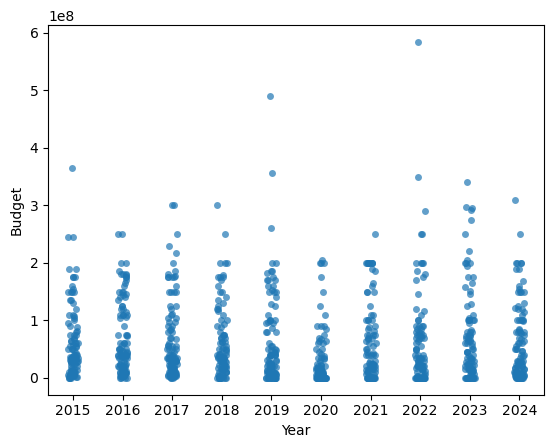

In [29]:
sns.stripplot(data = movies_2015_2024, x = 'Year', y = 'Budget', alpha=0.7);

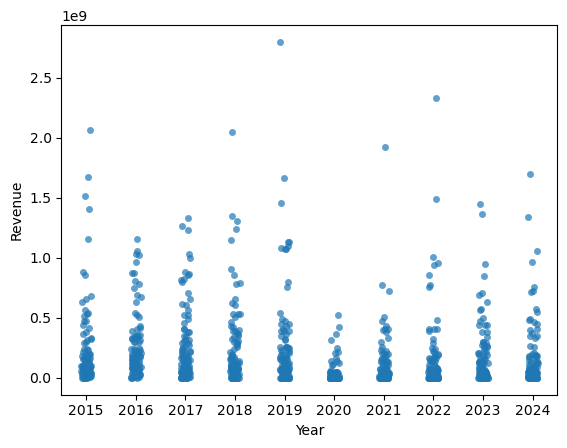

In [30]:
sns.stripplot(data = movies_2015_2024, x = 'Year', y = 'Revenue', alpha=0.7);

In [31]:
movies_2015_2024.nlargest(1, 'Revenue')

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
401,Avengers: Endgame,2019,"[Adventure, Science Fiction, Action]",8.237,26930,356000000,2799439100,299534,2443439100,True


In [32]:
#movies_2015_2024.plot(x='Year', y='Revenue', kind='line')

In [33]:
bins = [0, 10000, 50000, 100000, 250000, 500000, 900000, 5000000, 100000000, 200000000, 365000000]

In [34]:
labels = ['0-10000', '10000-50000', '50000-100000', '100000-250000', '250000-500000', '500000-900000', '900000-5000000', '5000000-100000000', '100000000-200000000', '200000000-365000000']

In [35]:
movies_2015_2024['range'] = pd.cut(movies_2015_2024['Revenue'], bins=bins, labels=labels, right=True)

In [36]:
movies_2015_2024.groupby('range')['Revenue'].count()

C:\Users\cat\AppData\Local\Temp\ipykernel_37336\1928584723.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movies_2015_2024.groupby('range')['Revenue'].count()


range
0-10000                  2
10000-50000              1
50000-100000             1
100000-250000            6
250000-500000            9
500000-900000            5
900000-5000000          32
5000000-100000000      346
100000000-200000000    155
200000000-365000000    113
Name: Revenue, dtype: int64

In [37]:
bins = [0, 900000, 5000000, 10000000, 20000000, 30000000, 40000000, 100000000, 200000000, 365000000]